## 載入套件

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 匯入資料

In [5]:
df = pd.read_csv('200811-201811.csv')
df.head()
#Danger分類點說明
#對敏感族群不健康為PM2.5數值在35.5以上

,SO2,CO,O3,PM25,Nox,NO,NO2,THC,NMHC,CH4,WindSpeed,TEMP,Humidity,Danger
0,4.4,0.47,32.2,31,24,3.46,20.84,2.309,0.231,2.078,1.91,24.86,77.11,0
1,6.4,0.52,30.2,32,32,5.64,26.30,2.186,0.227,1.959,1.72,26.58,71.93,0
2,3.2,0.45,30.5,46,20,2.36,18.05,0.000,0.000,0.000,2.08,24.75,76.33,1
3,5.2,0.47,32.5,38,24,3.18,20.64,2.374,0.225,2.150,1.66,24.97,79.97,1
4,4.5,0.72,29.9,32,29,5.43,23.82,2.290,0.287,2.004,1.03,26.18,73.78,0


## 載入標準化比例尺（StandardScaler）套件

In [6]:
from sklearn.preprocessing import StandardScaler

**StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale. For e.g. an Employee dataset will contain AGE column with values on scale 20-70 and SALARY column with values on scale 10000-80000.
As these two columns are different in scale, they are Standardized to have common scale while building machine learning model.**

In [7]:
#將Danger中特徵中移除，作為要預測的對象
scaler = StandardScaler()
scaler.fit(df.drop('Danger',axis=1))
scaled_features = scaler.transform(df.drop('Danger',axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,SO2,CO,O3,PM25,Nox,NO,NO2,THC,NMHC,CH4,WindSpeed,TEMP,Humidity
0,-0.404911,-0.027934,0.442396,-0.203618,0.143374,-0.393933,0.362969,0.840955,0.628490,0.848594,0.971649,0.946940,0.590249
1,0.409979,0.247408,0.186542,-0.143879,0.974468,0.438878,1.092702,0.718531,0.597833,0.716198,0.780465,1.077664,-0.503510
2,-0.893845,-0.138070,0.224920,0.692476,-0.272173,-0.814159,-0.009917,-1.457239,-1.141907,-1.463337,1.142708,0.938580,0.425552
3,-0.078955,-0.027934,0.480775,0.214559,0.143374,-0.500899,0.336238,0.905651,0.582505,0.928700,0.720091,0.955301,1.194140
4,-0.364166,1.348773,0.148164,-0.143879,0.662808,0.358653,0.761248,0.822044,1.057677,0.766264,0.086166,1.047263,-0.112882


## 將資料分成訓練組及測試組

In [9]:
from sklearn.model_selection import train_test_split

X = df_feat
y = df['Danger']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

## 使用KNN演算法

In [10]:
from sklearn.neighbors import KNeighborsClassifier

#從k值=1開始測試
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

## 使用混淆矩陣

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[215   9]
 [ 13 198]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       224
           1       0.96      0.94      0.95       211

   micro avg       0.95      0.95      0.95       435
   macro avg       0.95      0.95      0.95       435
weighted avg       0.95      0.95      0.95       435



## 利用 For迴圈，選擇K值

Text(0, 0.5, 'Error Rate')

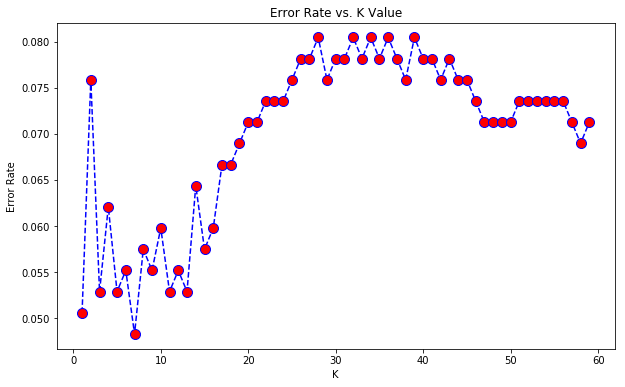

In [12]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5%-6%之間震盪，
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## 選擇K值=7

In [39]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[209  15]
 [  6 205]]


              precision    recall  f1-score   support

           0       0.97      0.93      0.95       224
           1       0.93      0.97      0.95       211

   micro avg       0.95      0.95      0.95       435
   macro avg       0.95      0.95      0.95       435
weighted avg       0.95      0.95      0.95       435



**顯示所有特徵**

In [24]:
df.head(1)

,SO2,CO,O3,PM25,Nox,NO,NO2,THC,NMHC,CH4,WindSpeed,TEMP,Humidity,Danger
0,4.4,0.47,32.2,31,24,3.46,20.84,2.309,0.231,2.078,1.91,24.86,77.11,0


**所有特徵**

**給與一筆數值，進行預測(Danger)**

In [31]:
classes={0:'Safe',1:'Danger'}

x_new=[[4,0.3,25,15,22,2.2,20,2.3,0.3,2.3,2,20,60]]
y_predict=knn.predict(x_new)
print(classes[y_predict[0]])

Danger


**給與一筆數值，進行預測(Safe)**

In [33]:
classes={0:'Safe',1:'Danger'}

x_new=[[1,0.3,1,1,2,1,1,1,0.1,1,0.5,30,50]]
y_predict=knn.predict(x_new)
print(classes[y_predict[0]])

Safe


## 評估KNN的準確率

In [32]:
knn.score(X_test, y_test)

0.9287356321839081